# Table of Contents
#### 01. Import Libraries and Data
#### 02. Addressing PII Data Privacy
#### 03. Creating Regional Segmentation of the Data
#### 04. Excluding Low activity Customers
#### 05. Customer Profiling
#### 06. Visualizations
#### 07. Aggregate Frequency of Usage and Expenditure.
#### 08 - 09. Customers Profiles Across Regions and Departments with Visualizations
#### 10. Export Data

## 01. Impotring Libraries and Data 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy 

In [7]:
df_final = pd.read_pickle(r'/Users/elenasharavara/Documents/08-2023 Instacart Grocery Basket Analysis /02 Data/Prepared Data/ords_prods_customer_merge_.pkl')

In [18]:
# Defining path
path = r'/Users/elenasharavara/Documents/08-2023 Instacart Grocery Basket Analysis'

In [6]:
# Importing Dataframe.
df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_customer_merge.pkl'))

## 02. Data Privacy

#### Addressing PII Data. 

Sensitive customer data, including name, address, email, and any other information that qualifies as personally identifiable information (PII), shall be purged from the database in compliance with data privacy and security regulations.

In [4]:
# checking data frame information
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   user_id                object  
 1   first name             object  
 2   last name              object  
 3   gender                 object  
 4   state                  object  
 5   age                    int64   
 6   joined date            object  
 7   dependants             int64   
 8   marital status         object  
 9   income                 int64   
 10  order_id               int64   
 11  order_number           int64   
 12  orders_day_of_week     int64   
 13  order_hour_of_day      int64   
 14  days_since_last_order  float64 
 15  new_customer           bool    
 16  product_id             int64   
 17  add_to_cart_order      int64   
 18  reordered              int64   
 19  product_name           object  
 20  aisle_id               int64   
 21  department_id          int64 

In [ ]:
# Dropping first and last name (PII) columns from dataframe.
df_final = df_final.drop(columns = ['first name', 'last name'])

In [6]:
# Checking the results
df_final.head()

,user_id,gender,state,age,joined date,dependants,marital status,income,order_id,order_number,...,busiest_days,besiest_period_of_day,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days,frequency_flag,_merge
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Busiest days,Most orders,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly days,Most orders,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Busiest days,Most orders,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regularly days,Most orders,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Slowest days,Most orders,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


## 03. Creating a Regional Segmentation.

In [11]:
# Defining Regions
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan','Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [14]:
# Creating region column base on state column.
df_final.loc[df_final['state'].isin (Northeast), 'region'] = 'Northeast'
df_final.loc[df_final['state'].isin (Midwest), 'region'] = 'Midwest'
df_final.loc[df_final['state'].isin (South), 'region'] = 'South'
df_final.loc[df_final['state'].isin (West), 'region'] = 'West'

In [15]:
# Checking new column.
df_final[['user_id', 'region', 'state']].head(20)

,user_id,region,state
0,1,South,Alabama
1,1,South,Alabama
2,1,South,Alabama
3,1,South,Alabama
4,1,South,Alabama
5,1,South,Alabama
6,1,South,Alabama
7,1,South,Alabama
8,1,South,Alabama
9,1,South,Alabama


In [10]:
# checking the shape of dataframe
df_final.shape

(32404859, 34)

In [16]:
# checcking "region" frequency
df_final['region'].value_counts()

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: region, dtype: int64

In [ ]:
# Checking spending habits of customers by regions.
spending_habits = pd.crosstab(df_final['region'], df_final['spending_flag'], dropna = False)

Text(0.5, 1.0, 'Spending Habits by Regions')

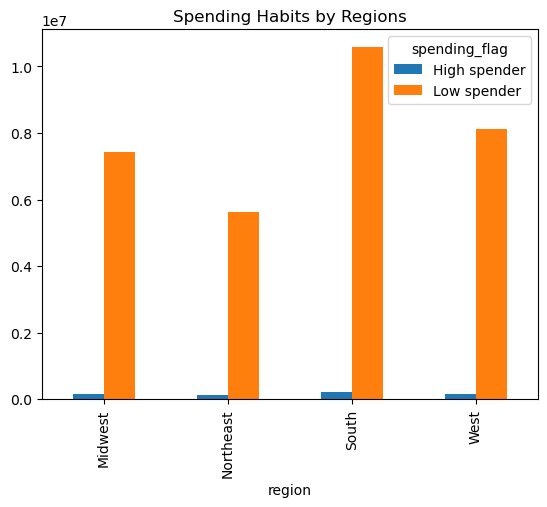

In [13]:
# creating a bar chart
bar_regions = spending_habits.plot.bar()
plt.title('Spending Habits by Regions')

### The below bar chart shows that the 'Low Spenders' generates the maximum revenue for Instacart. The maximum number of Low Spenders are from the South, followed by West and Midwest.


In [ ]:
# Exporting bar Chart.
bar_regions.figure.savefig(os.path.join(path, '04 Analysis', 'Visualzations',  'Spending_habits.png'))

## 04. Excluding Low activity Customers

In [15]:
# Creating flag for customer with less than 5 orders
df_final.loc[df_final['max_order'] >= 5, 'customer_activity'] = 'High active'

In [16]:
df_final.loc[df_final['max_order'] <5, 'customer_activity'] = 'Low active'

In [17]:
# Checking value counts of customer_activity column
df_final['customer_activity'].value_counts(dropna = False)


High active    30964564
Low active      1440295
Name: customer_activity, dtype: int64

In [18]:
# Creating a Subset of low active customers
low_activity_customers = df_final[df_final['customer_activity'] == 'Low activity']

In [19]:
# Checking the results
low_activity_customers.head()

,user_id,gender,state,age,joined date,dependants,marital status,income,order_id,order_number,...,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days,frequency_flag,_merge,region,customer_activity
729,168851,Male,South Carolina,30,1/1/2017,0,single,63712,1903574,1,...,Average orders,3,New customer,7.485714,Low spender,20.5,Regular customer,both,South,Low active
730,168851,Male,South Carolina,30,1/1/2017,0,single,63712,1193140,2,...,Most orders,3,New customer,7.485714,Low spender,20.5,Regular customer,both,South,Low active
731,168851,Male,South Carolina,30,1/1/2017,0,single,63712,1870356,3,...,Average orders,3,New customer,7.485714,Low spender,20.5,Regular customer,both,South,Low active
732,168851,Male,South Carolina,30,1/1/2017,0,single,63712,1903574,1,...,Average orders,3,New customer,7.485714,Low spender,20.5,Regular customer,both,South,Low active
733,168851,Male,South Carolina,30,1/1/2017,0,single,63712,1193140,2,...,Most orders,3,New customer,7.485714,Low spender,20.5,Regular customer,both,South,Low active


In [20]:
# Exporting subset 'low_active_customers' dataframe.
low_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Low_activity_customers.pkl'))

In [21]:
# Assigning High active flag to dataframe
high_activity_customers = df_final[df_final['customer_activity'] == 'High activity']

In [22]:
# checking shape
high_activity_customers.shape

(30964564, 35)

In [24]:
# Exporting 'high_active_customers' dataframe
high_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'High_activity_customers.pkl'))

## 05. Customers Profiling


### a) Customers Age Groups

In [25]:
# Analysing 'high_activity_customers' Dataframe
df_final2 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'High_activity_customers.pkl'))

In [26]:
# 'age' column frequency
df_final2['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [27]:
 # Age category column
df_final2.loc[(df_final2['age'] >35) & (df_final2['age'] <60), 'age_category'] = 'Middle-aged Adults'
df_final2.loc[df_final2['age'] >60, '>age_category'] = 'Senior Citizens'
df_final2.loc[df_final2['age'] <=35, 'age_category'] = 'Young Adults'

In [28]:
# Checking results
df_final2['age_category'].value_counts(dropna = False)

Middle-aged Adults    11651255
Senior Citizens       10112607
Young Adults           8738805
NaN                     461897
Name: age_category, dtype: int64

In [29]:
# Checking the shape
df_final2.shape

(30964564, 36)

### b) Customers Income

In [30]:
# Checking 'income' column
df_final2['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [31]:
# creating a flag for 'income' column
df_final2.loc[(df_final2['income'] >=25900) & (df_final2['income'] <100000), 'income_class'] = 'Lower-income'
df_final2.loc[(df_final2['income'] >=100000) & (df_final2['income'] <=200000), 'income_class'] = 'Middle-income'
df_final2.loc[df_final2['income'] >200000, 'income_class'] = 'Upper_income'

In [32]:
# Checking result
df_final2['income_class'].value_counts(dropna = False)

Lower-income     16757162
Middle-income    13953260
Upper_income       254142
Name: income_class, dtype: int64

### c) Department

In [33]:
# Importing department data 
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [34]:
# Checking department dataframe
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [35]:
# Rename column
df_dep = df_dep.rename(columns = {'Unnamed: 0' : 'department_id'})

In [36]:
# Checking result
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [37]:
# Checking key column for merge dataframe.
df_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [38]:
# Dropping '_merge' column from 'df_final2' dataframe
df_final2 = df_final2.drop(columns = ['_merge'])

In [39]:
# Merging the departments dataframe with high_activity_customers dataframe
df_merged = df_final2.merge(df_dep, on = 'department_id')

In [40]:
# checking the merge result.
df_merged[['user_id', 'department_id', 'department']].head(10)

,user_id,department_id,department
0,26711,7,beverages
1,26711,7,beverages
2,26711,7,beverages
3,33890,7,beverages
4,33890,7,beverages
5,33890,7,beverages
6,33890,7,beverages
7,65803,7,beverages
8,65803,7,beverages
9,65803,7,beverages


### d) Dependants

In [41]:
# Checking the frequency of dependants column
df_merged['dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: dependants, dtype: float64

In [42]:
# checking martitual status column.
df_merged['marital status'].value_counts(dropna = False)

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: marital status, dtype: int64

In [43]:
# Creating flag for number of dependents in a household.

df_merged.loc[(df_merged['marital status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_merged['dependants'] ==0), 'customer_profile'] = 'Single adult'

df_merged.loc[(df_merged['marital status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_merged['dependants'] >0), 'customer_profile'] = 'Young parent'

df_merged.loc[(df_merged['marital status']=='married') & (df_merged['dependants'] <=2), 'customer_profile'] = 'Family'

df_merged.loc[(df_merged['marital status']=='married') & (df_merged['dependants'] >2), 'customer_profile'] = 'Big Family'

In [44]:
# Checking the results.
df_merged[['marital status', 'dependants', 'customer_profile']].head(30)

,marital status,dependants,customer_profile
0,married,3,Big Family
1,married,3,Big Family
2,married,3,Big Family
3,single,0,Single adult
4,single,0,Single adult
5,single,0,Single adult
6,single,0,Single adult
7,married,2,Family
8,married,2,Family
9,married,2,Family


In [45]:
# Checking "customer_profile" frequency
df_merged['customer_profile'].value_counts(dropna = False)

Family          14459664
Single adult     7739681
Big Family       7284047
Young parent     1481172
Name: customer_profile, dtype: int64

In [46]:
# Checking dataframe shape
df_merged.shape

(30964564, 38)

## 06. Visualizations

Text(0.5, 1.0, 'Distribution of Age Groups')

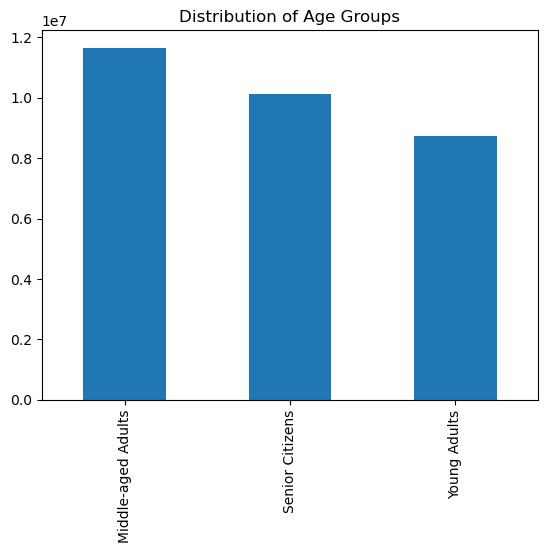

In [47]:
# Creating bar chart for 'age_category' 
bar_age_category = df_merged['age_category'].value_counts().sort_index().plot.bar()
plt.title('Distribution of Age Groups')

#### The below bar chart shows the distribution of customers age groups. Middle-aged customers group is the biggest one.

In [ ]:
# Exporting bar chart.
bar_age_category.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_category.png'))

In [ ]:
# Bar chart of income_class
bar_income_class = df_merged['income_class'].value_counts().plot.bar(title ='The Number of Orders by Income Class')

#### The bar chart prominently shows that the lower income class places the highest number of orders, indicating a stronger reliance on these services. In contrast, the middle income class follows with a moderately lower order count, while the upper income class exhibits notably fewer orders, suggesting a lower dependency on such services within this income bracket. 


In [ ]:
# Exporting bar chart 
bar_age_category.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_category.png'))

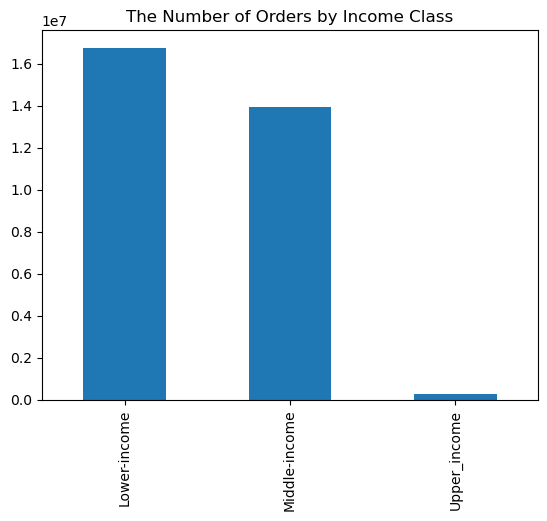

In [49]:
# Bar chart of income_class
bar_income_class = df_merged['income_class'].value_counts().plot.bar(title ='The Number of Orders by Income Class')

#### The bar chart prominently shows that the lower income class places the highest number of orders, indicating a stronger reliance on these services. In contrast, the middle income class follows with a moderately lower order count, while the upper income class exhibits notably fewer orders, suggesting a lower dependency on such services within this income bracket. 

In [ ]:
# Export bar chart
bar_income_class.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_income_class'))

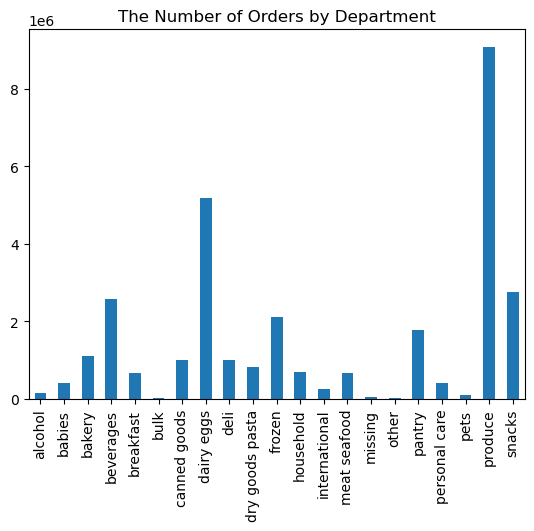

In [50]:
# Creating a bar chart for departments.
bar_department = df_merged['department'].value_counts().sort_index().plot.bar(title = 'The Number of Orders by Department')

#### Produce department has the highest frequency of product orders, than goes dairy/eggs department, accounting for slightly more than half of all produce orders. And than snacks, beverages and frozen.


In [ ]:
# Exporting bar chart
bar_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments.png'))

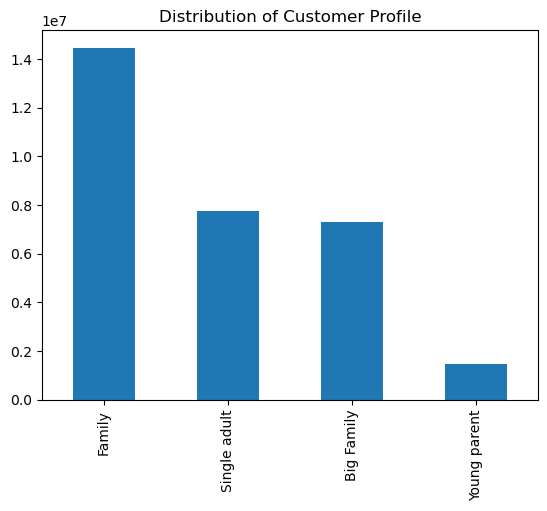

In [51]:
# Creating a bar chart for 'customer_profile'
bar_family_status = df_merged['customer_profile'].value_counts().plot.bar(title = 'Distribution of Customer Profile')

#### The below bar chart shows the distribution of customers profile. Customers, that have a family, make up the biggest group.

In [ ]:
# Exporting bar chart
bar_family_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_status.png'))

## 07. Aggregate Frequency of Usage and Expenditure.

### Customers Age Groups

In [52]:
# Aggregate min. max. and mean on customer's 'age_category'
age_category_agg = df_merged.groupby('age_category',)[['days_since_last_order','prices']].agg(['min','max','mean'])

In [53]:
# Checking results
age_category_agg

days_since_last_order                  prices        \
                                     min   max       mean    min   max   
age_category                                                             
Middle-aged Adults                   0.0  30.0  10.805012    1.0  25.0   
Senior Citizens                      0.0  30.0  10.791879    1.0  25.0   
Young Adults                         0.0  30.0  10.829007    1.0  25.0   

                              
                        mean  
age_category                  
Middle-aged Adults  7.790941  
Senior Citizens     7.796144  
Young Adults        7.784246

### Income Class of Customer

In [54]:
# Aggregate min. max. and mean on customer's 'income_class' for usage and expenditure.
income_class_agg = df_merged.groupby('income_class',)[['days_since_last_order','prices']].agg(['min','max','mean'])

In [55]:
# Checking results
income_class_agg

days_since_last_order                  prices                
                                min   max       mean    min   max      mean
income_class                                                               
Lower-income                    0.0  30.0  10.844815    1.0  25.0  7.652564
Middle-income                   0.0  30.0  10.782082    1.0  25.0  7.956613
Upper_income                    0.0  30.0  10.093070    1.0  25.0  7.777393

### Depandants

In [56]:
# Aggregate min. max. and mean on customer's 'customer_profile' for usage and expenditure.
customer_profile_agg = df_merged.groupby('customer_profile',)[['days_since_last_order','prices']].agg(['min','max','mean'])

In [57]:
# Checking results
customer_profile_agg

days_since_last_order                  prices                
                                   min   max       mean    min   max      mean
customer_profile                                                              
Big Family                         0.0  30.0  10.825634    1.0  25.0  7.790888
Family                             0.0  30.0  10.818477    1.0  25.0  7.789971
Single adult                       0.0  30.0  10.791951    1.0  25.0  7.789550
Young parent                       0.0  30.0  10.750995    1.0  25.0  7.800604

### Departments

In [58]:
# Aggregate min. max. and mean on 'customer_profile' 
dep_cus_profile_agg = df_merged.groupby(['customer_profile', 'department'])[['days_since_last_order','prices']].agg(['min','max','mean'])

In [59]:
# Checking results
dep_cus_profile_agg

days_since_last_order                  prices  \
                                                 min   max       mean    min   
customer_profile department                                                    
Big Family       alcohol                         0.0  30.0   9.872432    1.0   
                 babies                          0.0  30.0   9.612820    1.0   
                 bakery                          0.0  30.0  10.801945    1.0   
                 beverages                       0.0  30.0  10.813127    1.0   
                 breakfast                       0.0  30.0  11.041944    1.0   
...                                              ...   ...        ...    ...   
Young parent     pantry                          0.0  30.0  10.576674    1.0   
                 personal care                   0.0  30.0  11.313318    1.0   
                 pets                            0.0  30.0  11.389847    1.0   
                 produce                         0.0  30.0  10.569925    1.0   
                 snacks                          0.0  30.0  10.611435    1.6   

                                                
                                 max      mean  
customer_profile department                     
Big Family       alcohol        15.0  8.260335  
                 babies         15.0  7.658709  
                 bakery         15.0  7.867693  
                 beverages      15.0  7.667362  
                 breakfast      14.9  8.012552  
...                              ...       ...  
Young parent     pantry         20.0  8.016946  
                 personal care  15.0  7.938132  
                 pets           15.0  7.918097  
                 produce        15.0  8.003058  
                 snacks          7.0  4.265732  

[84 rows x 6 columns]

## 08 - 09. Customers Profiles Across Regions and Departments with Visualizations

In [60]:
# Checking the relationship between 'age_category' & 'income_class' of customers profile in differnet regions
profile_age_reg = df_merged.groupby('region')[['income_class','age_category']].value_counts().reset_index(name='count')

In [61]:
# Checking the output
profile_age_reg

,region,income_class,age_category,count
0,Midwest,Lower-income,Young Adults,1946965
1,Midwest,Middle-income,Senior Citizens,1634740
2,Midwest,Middle-income,Middle-aged Adults,1568006
3,Midwest,Lower-income,Middle-aged Adults,1192931
4,Midwest,Lower-income,Senior Citizens,694477
5,Midwest,Middle-income,Young Adults,62583
6,Midwest,Upper_income,Senior Citizens,27553
7,Midwest,Upper_income,Middle-aged Adults,26722
8,Midwest,Upper_income,Young Adults,8863
9,Northeast,Lower-income,Young Adults,1511489


In [62]:
# Checking income_class by regions
region_income = pd.crosstab(df_merged['income_class'],df_merged['region'], dropna = False)

In [63]:
# Checking results
region_income

region,Midwest,Northeast,South,West
income_class,,,,
Lower-income,3861420,2948201,5647194,4300347
Middle-income,3336000,2476378,4580499,3560383
Upper_income,64093,40106,83446,66497


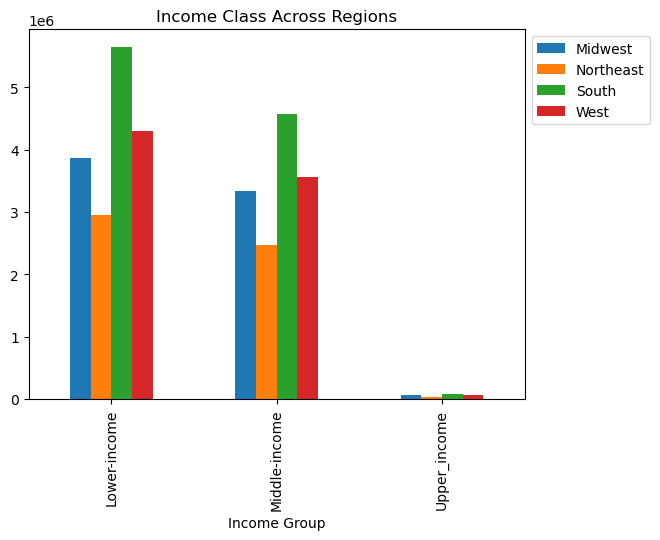

In [64]:
# Visualtization of 'income_class' and 'region'
bar_region_income = region_income.plot.bar(title = 'Income Class Across Regions')
plt.xlabel("Income Group")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

#### The below bar chart shows the income class groups across the regions. In both segments of low spenders and high spenders, the ordering habits mirror the same regional trends. The South region leads in ordering habits, followed by the West region, while the Northeast region lags behind. The Midwest region demonstrates slightly better ordering habits than the Northeast but doesn't reach the levels of the South and West regions.

In [ ]:
# Export bar chart
bar_region_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_income.png'))

In [65]:
# Piovt the data to create a stacked bar chart to see relationship between 'departments' and 'customers_profile'
customer_fam_dep = df_merged.groupby(['department', 'customer_profile']).size().unstack(fill_value=0)

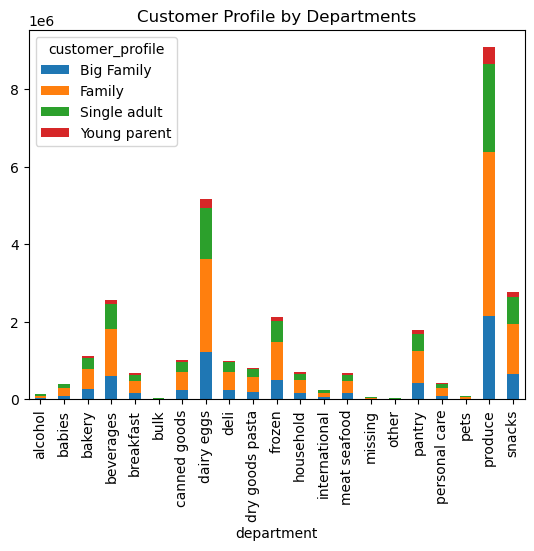

In [66]:
#stacked bar graph
stacked_cust_dept = customer_fam_dep.plot.bar(stacked = True, title = 'Customer Profile by Departments')

#### The below bar chart shows the customers profile by departments. The key observation here is that the "Family" category consistently displays the highest ordering habits. Out visualization shows some variations in ordering habits across age groups and family types, it appears that family status (specifically, family category) might have a more pronounced impact on ordering habits within the context of these product departments than age alone. 



In [ ]:
# Export stacked bar chart
stacked_cust_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_cust_dept.png'))

In [67]:
# Create a crosstab to count the occurrences of age categories in each department
cross_tab = pd.crosstab(df_merged['department'], df_merged['age_category'])

<Figure size 1200x600 with 0 Axes>

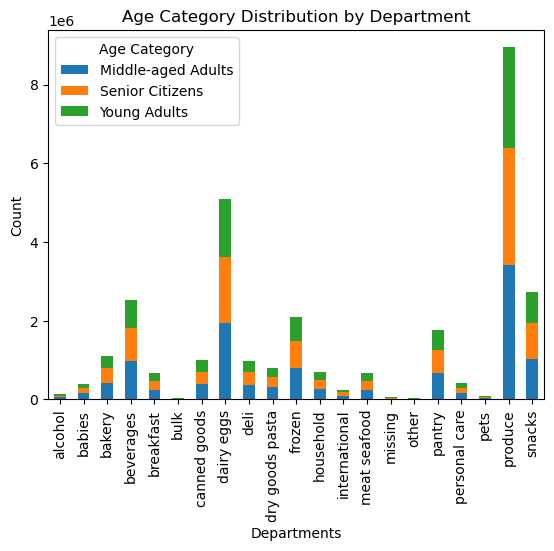

In [68]:
# Creating a clustered bar chart
plt.figure(figsize=(12, 6))
clustered_age_dept = cross_tab.plot(kind ='bar', stacked = True, title ='Age Category Distribution by Department')
plt.xlabel('Departments')
plt.ylabel('Count')
plt.legend(title ='Age Category')

#### The below bar chart shows the customers age categories distribution by departments. Analyzing ordering habits across different age groups (Young adults, Middle-aged adults, and Senior citizens) for various product departments,  we didnt reveal a distinct pattern. Ordering habits seem to vary across departments regardless of age. 


In [ ]:
# Exporting clustered bar chart
clustered_age_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'clustered_age_dept.png',))

In [69]:
# Checking customer_profile by region
cust_by_region = pd.crosstab(df_merged['customer_profile'],df_merged['region'], dropna = False)

In [70]:
cust_by_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Big Family,1671542,1291928,2425559,1895018
Family,3415720,2561845,4798190,3683909
Single adult,1822816,1354482,2581933,1980450
Young parent,351435,256430,505457,367850


Text(0.5, 1.0, 'Customer Profile Distribution by Region')

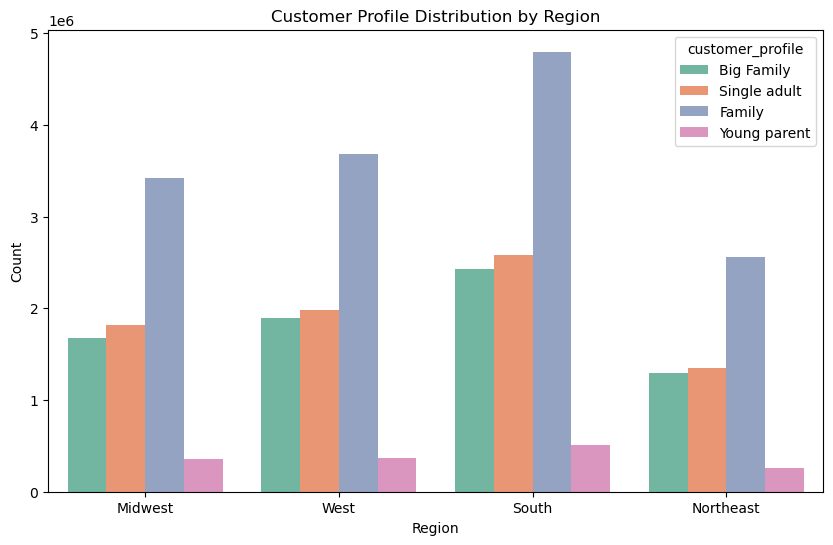

In [71]:
# Create a countplot to visualize the distribution of 'customer_profile' in each 'region'
plt.figure(figsize=(10, 6))
countplot_profile_region = sns.countplot(x='region', hue='customer_profile', data=df_merged, palette='Set2')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Customer Profile Distribution by Region')

#### The below bar chart shows the customers profile distribution by region. South and West regions have customers with higher ordering habits, while the Northeast region has customers with lower ordering habits. The Midwest region falls in between, displaying moderately better ordering habits compared to the Northeast.

In [72]:
# exporting Countplot bar chart
countplot_profile_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Countplot_Customer_Profile_Region_Relationship.png'))

## 10. Export Data

In [73]:
# checking data frame shape
df_merged.shape

(30964564, 38)

In [74]:
# checking Dataframe information
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 30964563
Data columns (total 38 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   user_id                object 
 1   gender                 object 
 2   state                  object 
 3   age                    int64  
 4   joined date            object 
 5   dependants             int64  
 6   marital status         object 
 7   income                 int64  
 8   order_id               int64  
 9   order_number           int64  
 10  orders_day_of_week     int64  
 11  order_hour_of_day      int64  
 12  days_since_last_order  float64
 13  new_customer           bool   
 14  product_id             int64  
 15  add_to_cart_order      int64  
 16  reordered              int64  
 17  product_name           object 
 18  aisle_id               int64  
 19  department_id          int64  
 20  prices                 float64
 21  price_range_loc        object 
 22  busiest_day     

In [75]:
# checking Dataframe results
df_merged.head(10)

,user_id,gender,state,age,joined date,dependants,marital status,income,order_id,order_number,...,average_price,spending_flag,median_days,frequency_flag,region,customer_activity,age_category,income_class,department,customer_profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,7.988889,Low spender,19.0,Regular customer,Midwest,High active,Middle-aged Adults,Middle-income,beverages,Big Family
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,7.988889,Low spender,19.0,Regular customer,Midwest,High active,Middle-aged Adults,Middle-income,beverages,Big Family
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,7.988889,Low spender,19.0,Regular customer,Midwest,High active,Middle-aged Adults,Middle-income,beverages,Big Family
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,...,7.057534,Low spender,26.0,Regular customer,West,High active,Middle-aged Adults,Lower-income,beverages,Single adult
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,...,7.057534,Low spender,26.0,Regular customer,West,High active,Middle-aged Adults,Lower-income,beverages,Single adult
5,33890,Female,New Mexico,36,1/1/2017,0,single,59285,896617,5,...,7.057534,Low spender,26.0,Regular customer,West,High active,Middle-aged Adults,Lower-income,beverages,Single adult
6,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,...,7.057534,Low spender,26.0,Regular customer,West,High active,Middle-aged Adults,Lower-income,beverages,Single adult
7,65803,Male,Idaho,35,1/1/2017,2,married,99568,3233494,6,...,8.375962,Low spender,7.0,Frequent customer,West,High active,Young Adults,Lower-income,beverages,Family
8,65803,Male,Idaho,35,1/1/2017,2,married,99568,142275,8,...,8.375962,Low spender,7.0,Frequent customer,West,High active,Young Adults,Lower-income,beverages,Family
9,65803,Male,Idaho,35,1/1/2017,2,married,99568,3114332,9,...,8.375962,Low spender,7.0,Frequent customer,West,High active,Young Adults,Lower-income,beverages,Family


In [77]:
# Exporting Dataframe.
df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customer_merge.pkl'))